# Análisis de los datos

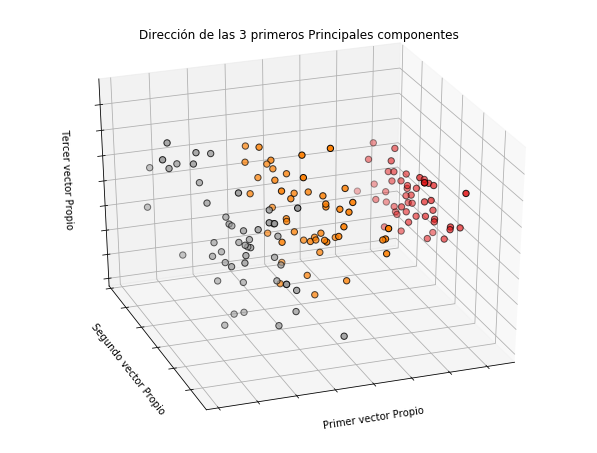

In [124]:
# Importamos DataSet IRIS y Naive bayes asumiendo que la Distribusión de las caracteríasticas es Gausiana 
# Importamos matplotlib para graficar parte de los datos por medio de un gráfico 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
#Cargamos el dataset y asignamos x como vector característico y "y" como etiqueta
iris = datasets.load_iris()

x = iris.data
y = iris.target

# Como no podemos realizar una gráfica a 4 dimensiones entonces hacemos una gráfica a 3 dimensiones de los datos
# se graficarán las primeras 3 dimensiones de PCA ( Principal Component Analysis)

"""
"Reducción de Dimensionalidad lineal usando la Decomposición en valores singulares de los datos 
para proyectar los mismos en un espacio reducido." SKlear API

"En álgebra lineal, la descomposición en valores singulares de una matriz real o compleja 
es una factorización de la misma con muchas aplicaciones en estadística y otras disciplinas." Wikipedia
"""

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Dirección de las 3 primeros Principales componentes")
ax.set_xlabel("Primer vector Propio")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Segundo vector Propio")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Tercer vector Propio")
ax.w_zaxis.set_ticklabels([])

plt.show()
#La data esta conformada por una matríz de 150*4 esto quiere decir 150 flores con 4 características principales cada uno

#Longitud del Sépalo, Anchura del Sépalo, Longitud del pétalo y Anchura del pétalo.

#[[5.1 3.5 1.4 0.2]
# [4.9 3.  1.4 0.2]
#   .   .   .   .
#   .   .   .   .
#   .   .   .   .
# [5.9 3.  5.1 1.8]]


#Las etiquetas estan conformadas por un arreglo de 150 etiquetas (una por cada flor).

#Setosa = 0
#Versicolour = 1
#Virginica = 2

#[0 0 0 0 0 ... 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2]




# Naive Bayes From Scratch

In [107]:
import numpy as np

# Esta función calcula la probabilidad condicional p(x | y):
def p_condicional(x, media_y, varianza_y):
    # Función de Densidad de probabilidad Gaussiana 
    p = 1/(np.sqrt(2*np.pi*varianza_y)) * np.exp((-(x-media_y)**2)/(2*varianza_y))
    return p

In [122]:
def do_list(planta, shift, data = x, periodo = 4):
    return np.take(data,periodo*np.argwhere(y==planta).ravel()+shift)

In [127]:
# Numero de Flores Setosa
n_Setosa = (y==0).sum()

# Numero de Flores Versicolour
n_Versicolour = (y==1).sum()

# Numero de Flores Virginica
n_Virginica = (y==2).sum()

# Total Flores
n = y.size

print("Número de Flores Setosa: "+str(n_Setosa))
print("Número de Flores Versicolour: "+str(n_Versicolour))
print("Número de Flores Virginica: "+str(n_Virginica))

# Frecuencia relativa de Flores Setosa
P_Setosa = n_Setosa/n

# Frecuencia relativa de Flores Versicolour
P_Versicolour = n_Versicolour/n

# Frecuencia relativa de Flores Virginica
P_Virginica = n_Virginica/n

print("Frecuencia relativa de Flores Setosa: "+str(P_Setosa))
print("Frecuencia relativa de Flores Versicolour: "+str(P_Versicolour))
print("Frecuencia relativa de Flores Virginica: "+str(P_Virginica))

#Longitud del Sépalo, Anchura del Sépalo, Longitud del pétalo y Anchura del pétalo.

media_longSep_Setosa = np.mean(do_list(0,0))
media_anchSep_Setosa = np.mean(do_list(0,1))
media_longPet_Setosa = np.mean(do_list(0,2))
media_anchPet_Setosa = np.mean(do_list(0,3))

media_longSep_Versicolour = np.mean(do_list(1,0))
media_anchSep_Versicolour = np.mean(do_list(1,1))
media_longPet_Versicolour = np.mean(do_list(1,2))
media_anchPet_Versicolour = np.mean(do_list(1,3))

media_longSep_Virginica = np.mean(do_list(2,0))
media_anchSep_Virginica = np.mean(do_list(2,1))
media_longPet_Virginica = np.mean(do_list(2,2))
media_anchPet_Virginica = np.mean(do_list(2,3))

varianza_longSep_Setosa = np.var(do_list(0,0))
varianza_anchSep_Setosa = np.var(do_list(0,1))
varianza_longPet_Setosa = np.var(do_list(0,2))
varianza_anchPet_Setosa = np.var(do_list(0,3))

varianza_longSep_Versicolour = np.var(do_list(1,0))
varianza_anchSep_Versicolour = np.var(do_list(1,1))
varianza_longPet_Versicolour = np.var(do_list(1,2))
varianza_anchPet_Versicolour = np.var(do_list(1,3))

varianza_longSep_Virginica = np.var(do_list(2,0))
varianza_anchSep_Virginica = np.var(do_list(2,1))
varianza_longPet_Virginica = np.var(do_list(2,2))
varianza_anchPet_Virginica = np.var(do_list(2,3))

etiquetas_Buenas = 0

# Aplicamos Bayes (Prob Marginal Ignorada por ser constante)
for i in range(n):
    # Probabilidad posterior que sea Setosa
    P_Bayes_Setosa = P_Setosa * p_condicional(x[i][0],media_longSep_Setosa, varianza_longSep_Setosa) * \
                     p_condicional(x[i][1],media_anchSep_Setosa, varianza_anchSep_Setosa) * \
                     p_condicional(x[i][2],media_longPet_Setosa, varianza_longPet_Setosa) * \
                     p_condicional(x[i][3],media_anchPet_Setosa, varianza_anchPet_Setosa)
        
    
    # Probabilidad posterior que sea Versicolour
    P_Bayes_Versicolour = P_Versicolour * p_condicional(x[i][0],media_longSep_Versicolour, varianza_longSep_Versicolour) * \
                     p_condicional(x[i][1],media_anchSep_Versicolour, varianza_anchSep_Versicolour) * \
                     p_condicional(x[i][2],media_longPet_Versicolour, varianza_longPet_Versicolour) * \
                     p_condicional(x[i][3],media_anchPet_Versicolour, varianza_anchPet_Versicolour)
    
    # Probabilidad posterior que sea Virginica
    P_Bayes_Virginica = P_Virginica * p_condicional(x[i][0],media_longSep_Virginica, varianza_longSep_Virginica) * \
                     p_condicional(x[i][1],media_anchSep_Virginica, varianza_anchSep_Virginica) * \
                     p_condicional(x[i][2],media_longPet_Virginica, varianza_longPet_Virginica) * \
                     p_condicional(x[i][3],media_anchPet_Virginica, varianza_anchPet_Virginica)
    
    
    index = np.argmax([P_Bayes_Setosa,  P_Bayes_Versicolour, P_Bayes_Virginica])
    if (index==y[i]):
        etiquetas_Buenas+=1

print("Número de etiquetados erroneos Asumiendo Distribución Gaussiana de los datos: "+str(n-etiquetas_Buenas)+ ", total de etiquetas en el modelo: "+ str(n))


Número de Flores Setosa: 50
Número de Flores Versicolour: 50
Número de Flores Virginica: 50
Frecuencia relativa de Flores Setosa: 0.3333333333333333
Frecuencia relativa de Flores Versicolour: 0.3333333333333333
Frecuencia relativa de Flores Virginica: 0.3333333333333333
Número de etiquetados erroneos Asumiendo Distribución Gaussiana de los datos: 6, total de etiquetas en el modelo: 150


In [20]:
#Asignamos los clasificador a variables
gnb = GaussianNB()
mnl = MultinomialNB() 
bnll = BernoulliNB()

#Entrenamos con Naive Bayes con las características de las flores en iris.data y con sus respectivas etiquetas iris.target
modelo_predictivo_gnb = gnb.fit(x, y)
modelo_predictivo_mnl = mnl.fit(x, y)
modelo_predictivo_bnll = bnll.fit(x, y)


#Predecimos "y" con datos x, ya que sabemos que es el label con el modelo entrenado previamente
y_pred_gnb = modelo_predictivo_gnb.predict(x)
y_pred_mnl = modelo_predictivo_mnl.predict(x)
y_pred_bnll = modelo_predictivo_bnll.predict(x)

print("Número de etiquetados erroneos con GaussianNB: "+str((y != y_pred_gnb).sum())+ ", total de etiquetas en el modelo: "+ str(x.shape[0]))
print("Número de etiquetados erroneos con MultinomialNB: "+str((y != y_pred_mnl).sum())+ ", total de etiquetas en el modelo: "+ str(x.shape[0]))
print("Número de etiquetados erroneos con BernoulliNB: "+str((y != y_pred_bnll).sum())+ ", total de etiquetas en el modelo: "+ str(x.shape[0]))

Número de etiquetados erroneos con GaussianNB: 6, total de etiquetas en el modelo: 150
Número de etiquetados erroneos con MultinomialNB: 7, total de etiquetas en el modelo: 150
Número de etiquetados erroneos con BernoulliNB: 100, total de etiquetas en el modelo: 150
